In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib.pyplot import figure, show
from astropy.io import fits
from astropy.table import Table
from __future__ import print_function
import numpy as np
from astropy import units
from clusterlensing import ClusterEnsemble

In [49]:
hdul = fits.open('Selection.fits')
data = hdul[1].data
z = data.field('zph') # Obtain redshift column
n200 = data.field('NR200') # Obtain flux for g band

In [59]:
N200 = n200[:10]
z = z[:10]

In [61]:
c = ClusterEnsemble(z)
c.describe

'Ensemble of galaxy clusters and their properties.'

In [62]:
c.show()


Cluster Ensemble:


,z
0,0.103
1,0.135
2,0.286
3,0.135
4,0.167
5,0.167
6,0.286
7,0.227
8,0.173
9,0.275



Mass-Richness Power Law: M200 = norm * (N200 / 20) ^ slope
   norm: 27000000000000.0 solMass
   slope: 1.4


In [63]:
c.n200 = N200

In [64]:
c.show()


Cluster Ensemble:


,z,n200,m200,r200,c200,delta_c,rs
0,0.103,188,6.219318e+14,1.740014,4.285895,6144.140172,0.405986
1,0.135,99,2.534026e+14,1.275841,4.641204,7345.457670,0.274894
2,0.286,88,2.148808e+14,1.142934,4.505614,6871.486350,0.253669
3,0.135,115,3.125351e+14,1.368230,4.547268,7015.030476,0.300891
4,0.167,98,2.498264e+14,1.255593,4.605539,7218.905065,0.272627
5,0.167,70,1.559764e+14,1.073139,4.820085,8000.718531,0.222639
6,0.286,61,1.286422e+14,0.963274,4.727171,7656.073685,0.203774
7,0.227,68,1.497732e+14,1.035960,4.749547,7738.221565,0.218118
8,0.173,107,2.825264e+14,1.305351,4.543255,7001.124614,0.287316
9,0.275,49,9.466649e+13,0.873292,4.882772,8238.531898,0.178852



Mass-Richness Power Law: M200 = norm * (N200 / 20) ^ slope
   norm: 27000000000000.0 solMass
   slope: 1.4


In [87]:
c.massrich_slope = 1.6
c.show()


Cluster Ensemble:


,z,n200,m200,r200,c200,delta_c,rs
0,0.103,188,9.735726e+14,2.020356,4.101149,5570.679611,0.492632
1,0.135,99,3.489250e+14,1.419396,4.498702,6847.844035,0.315512
2,0.286,88,2.889935e+14,1.261590,4.382412,6457.508823,0.287876
3,0.135,115,4.434374e+14,1.537460,4.394794,6498.404064,0.349837
4,0.167,98,3.433029e+14,1.395925,4.466197,6737.323976,0.312553
5,0.167,70,2.003884e+14,1.166614,4.704755,7574.317289,0.247965
6,0.286,61,1.607843e+14,1.037616,4.629549,7303.954123,0.224129
7,0.227,68,1.913066e+14,1.124022,4.640275,7342.143212,0.242232
8,0.173,107,3.951207e+14,1.459769,4.398551,6510.844043,0.331875
9,0.275,49,1.132477e+14,0.927051,4.801333,7930.408889,0.193082



Mass-Richness Power Law: M200 = norm * (N200 / 20) ^ slope
   norm: 27000000000000.0 solMass
   slope: 1.6


# Calculate Σ(r) and ΔΣ(r) for NFW model

In [88]:
rmin, rmax = 0.1, 6. # Mpc
nbins = 20
rbins = np.logspace(np.log10(rmin), np.log10(rmax), num = nbins)
print('rbins range from', rbins.min(), 'to', rbins.max(), 'Mpc')

rbins range from 0.1 to 6.0 Mpc


In [89]:
c.calc_nfw(rbins)    # calculate the profiles
sigma = c.sigma_nfw  # access the profiles
deltasigma = c.deltasigma_nfw

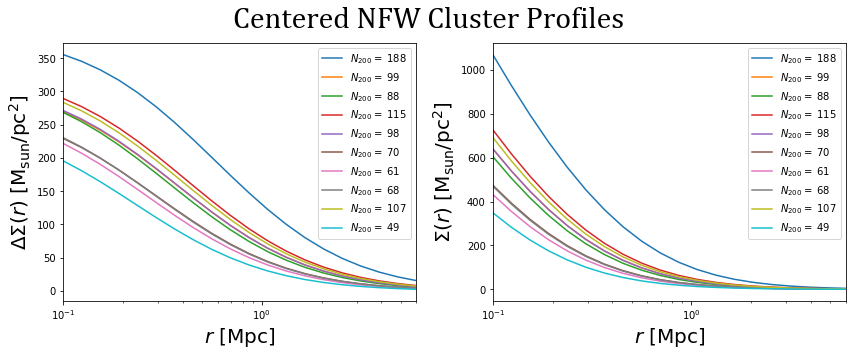

In [90]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('Centered NFW Cluster Profiles', fontname='Cambria Math',size=30)
first = fig.add_subplot(1,2,1)
second = fig.add_subplot(1,2,2)
for rich, profile in zip(c.n200,deltasigma):
    first.plot(rbins, profile, label='$N_{200}=$ '+str(rich))
first.set_xscale('log')
first.set_xlabel('$r\ [\mathrm{Mpc}]$',fontname='Cambria Math',fontsize=20)
ytitle = '$\Delta\Sigma(r)\ [\mathrm{M}_\mathrm{sun}/\mathrm{pc}^2]$'
first.set_ylabel(ytitle, fontsize=20)
first.set_xlim(rbins.min(), rbins.max())
first.legend(fontsize=10)

for rich, profile in zip(c.n200,sigma):
    second.plot(rbins, profile, label='$N_{200}=$ '+str(rich))
second.set_xscale('log')
second.set_xlabel('$r\ [\mathrm{Mpc}]$', fontsize=20)
ytitle = '$\Sigma(r)\ [\mathrm{M}_\mathrm{sun}/\mathrm{pc}^2]$'
second.set_ylabel(ytitle, fontsize=20)
second.set_xlim(0.05, 1.)
second.set_xlim(rbins.min(), rbins.max())
second.legend(fontsize=10)
fig.tight_layout()
plt.subplots_adjust(top=0.88)


In [91]:
offsets = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])  # same length as number of clusters
c.calc_nfw(rbins, offsets=offsets)
deltasigma_off = c.deltasigma_nfw
sigma_off = c.sigma_nfw

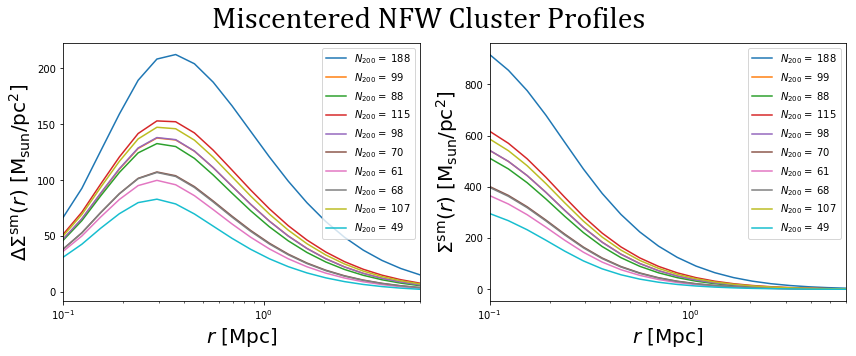

In [92]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('Miscentered NFW Cluster Profiles', fontname='Cambria Math', size=30)
first = fig.add_subplot(1,2,1)
second = fig.add_subplot(1,2,2)
for rich, profile in zip(c.n200,deltasigma_off):
    first.plot(rbins, profile, label='$N_{200}=$ '+str(rich))
first.set_xscale('log')
first.set_xlabel('$r\ [\mathrm{Mpc}]$', fontsize=20)
ytitle = '$\Delta\Sigma^\mathrm{sm}(r)\ [\mathrm{M}_\mathrm{sun}/\mathrm{pc}^2]$'
first.set_ylabel(ytitle, fontsize=20)
first.set_xlim(rbins.min(), rbins.max())
first.legend(fontsize=10)

for rich, profile in zip(c.n200,sigma_off):
    second.plot(rbins, profile, label='$N_{200}=$ '+str(rich))
second.set_xscale('log')
second.set_xlabel('$r\ [\mathrm{Mpc}]$', fontsize=20)
ytitle = '$\Sigma^\mathrm{sm}(r)\ [\mathrm{M}_\mathrm{sun}/\mathrm{pc}^2]$'
second.set_ylabel(ytitle, fontsize=20)
second.set_xlim(rbins.min(), rbins.max())
second.legend(fontsize=10)
fig.tight_layout()
plt.subplots_adjust(top=0.88)